- 회귀분석

- 단순회귀분석, 다중회귀분석
- 임의 데이터(매출액=종속변수, 소득/금리/물가=설명변수)
- 회귀분석(OLS) 
- 잔차검정(정규성·등분산성·독립성) 수행
- 시각화(잔차 진단 플롯 4종)

### 1. 단순회귀분석

In [28]:
# 데이터 준비
import pandas as pd

df = pd.DataFrame({
    "sales":  [100, 120, 130, 140, 150, 200, 220, 180, 190, 200, 210, 120],
    "income": [10, 12, 13, 14, 15, 16, 17, 20, 22, 19, 20, 22]
})

In [29]:
import statsmodels.api as sm

# 설명변수(X), 종속변수(y)
X = df["income"]
y = df["sales"]

# 상수항 추가 (절편)
X_const = sm.add_constant(X)

# 회귀모형 적합
model = sm.OLS(y, X_const).fit()

# 결과 출력
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     4.870
Date:                Tue, 06 Jan 2026   Prob (F-statistic):             0.0518
Time:                        00:19:04   Log-Likelihood:                -58.744
No. Observations:                  12   AIC:                             121.5
Df Residuals:                      10   BIC:                             122.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.7328     45.837      1.412      0.1

C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)


- 결과에서 볼 핵심
- coef (income): 소득 1 증가 시 매출 평균 변화량
- const: 절편
- income 통계적 유의성: 0.1 유의 ,  0.05 유의하지 않음. 
- R-squared: 설명력
- P>|t|: 유의성(p-value)

In [30]:
# 회귀식 확인
print(f"회귀식: sales = {model.params['const']:.2f} + {model.params['income']:.2f} × income")


회귀식: sales = 64.73 + 5.92 × income


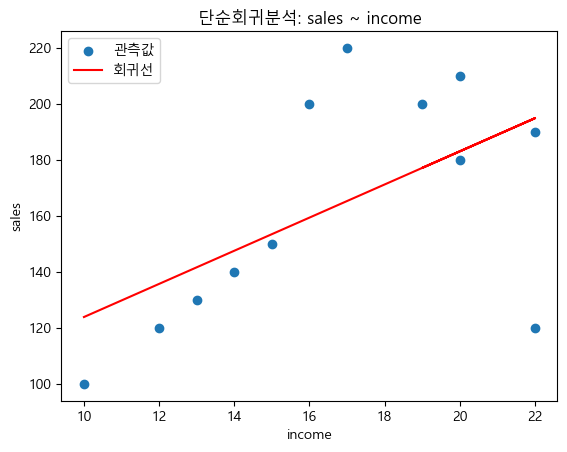

In [31]:
# 회귀선 시각화

import matplotlib.pyplot as plt

from matplotlib import rc
rc('font', family='Malgun Gothic')   # 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False



plt.scatter(df["income"], df["sales"], label="관측값") #산점도 그리기, label="관측값" : 범례(legend)에 표시될 이름
plt.plot(df["income"], model.predict(X_const), color="red", label="회귀선") # 회귀선 그리기
plt.xlabel("income") # x축 변수 이름을 "income"으로 표시
plt.ylabel("sales")
plt.title("단순회귀분석: sales ~ income")
plt.legend() # 범례 표시
plt.show()


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.DataFrame({
    "sales":  [100, 120, 130, 140, 150, 200, 220, 180, 190, 200, 210, 120],
    "income": [10, 12, 13, 14, 15, 16, 17, 20, 22, 19, 20, 22]
})

x = df["income"]
y = df["sales"]


### 2.기준 회귀선 + 𝑤 변화 비교((b 고정)

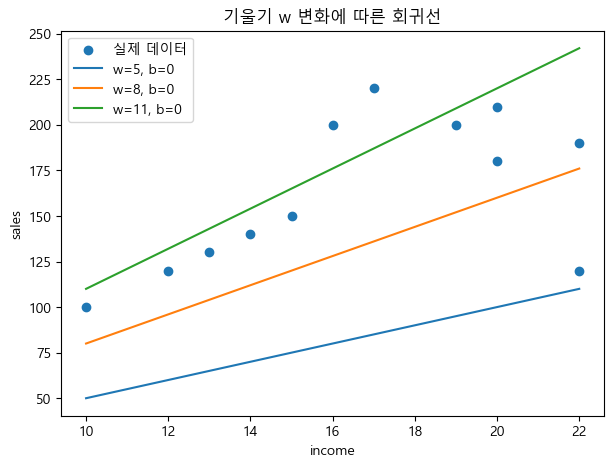

In [33]:
b = 0                 # 절편 고정
w_values = [5, 8, 11] # 기울기 변화

plt.figure(figsize=(7, 5)) # 그래프의 가로 7인치, 세로 5인치로 설정,  시각적으로 보기 좋은 크기 조절
plt.scatter(x, y, label="실제 데이터")  # 실제 데이터 산점도

x_line = np.linspace(x.min(), x.max(), 100)  # x.min() ~ x.max() 구간을100개의 균일한 점으로 나눔, 직선을 부드럽게 그리기 위한 x좌표

# 기울기별 직선 그리기
for w in w_values:
    y_line = w * x_line + b
    plt.plot(x_line, y_line, label=f"w={w}, b={b}")

plt.xlabel("income")
plt.ylabel("sales")
plt.title("기울기 w 변화에 따른 회귀선")
plt.legend()
plt.show()


#### 절편 𝑏 변화 비교

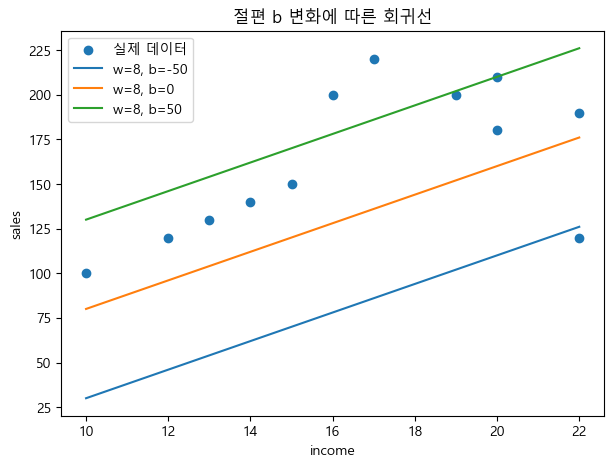

In [34]:
w = 8                  # 기울기 고정
b_values = [-50, 0, 50]  # 절편 변화

plt.figure(figsize=(7, 5))
plt.scatter(x, y, label="실제 데이터")

for b in b_values:
    y_line = w * x_line + b
    plt.plot(x_line, y_line, label=f"w={w}, b={b}")

plt.xlabel("income")
plt.ylabel("sales")
plt.title("절편 b 변화에 따른 회귀선")
plt.legend()
plt.show()


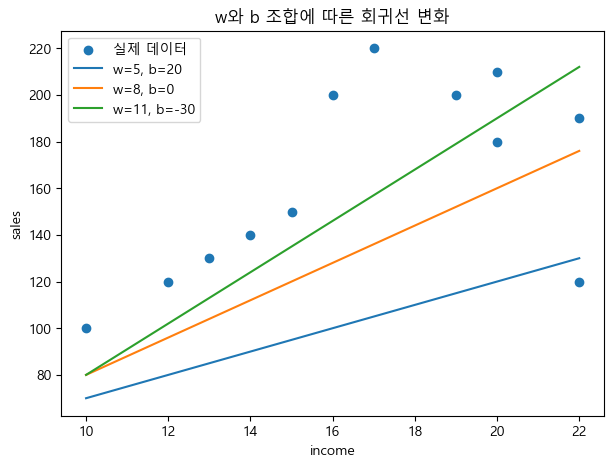

In [35]:
params = [
    (5, 20),
    (8, 0),
    (11, -30)
]

plt.figure(figsize=(7, 5))
plt.scatter(x, y, label="실제 데이터")

for w, b in params:
    y_line = w * x_line + b
    plt.plot(x_line, y_line, label=f"w={w}, b={b}")

plt.xlabel("income")
plt.ylabel("sales")
plt.title("w와 b 조합에 따른 회귀선 변화")
plt.legend()
plt.show()


### 3.  경사하강법으로 w, b가 업데이트되는 과정 시각화

- 선형회귀 모델을 정의 → MSE 손실 계산 → 미분 → 경사하강법으로 w, b를 점진적으로 최적화

최종 w, b: 8.917355798721573 12.098516566393146
최종 MSE: 1184.0590521582217


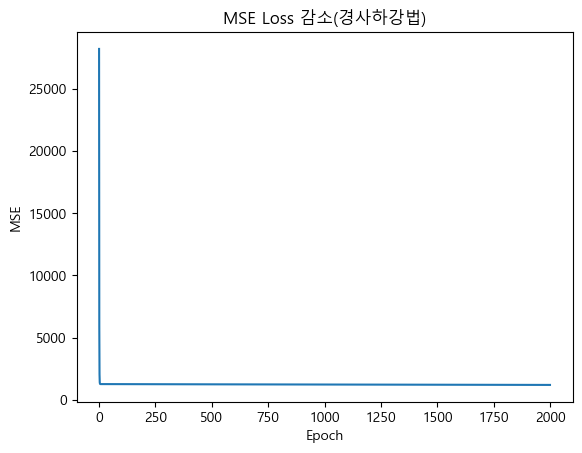

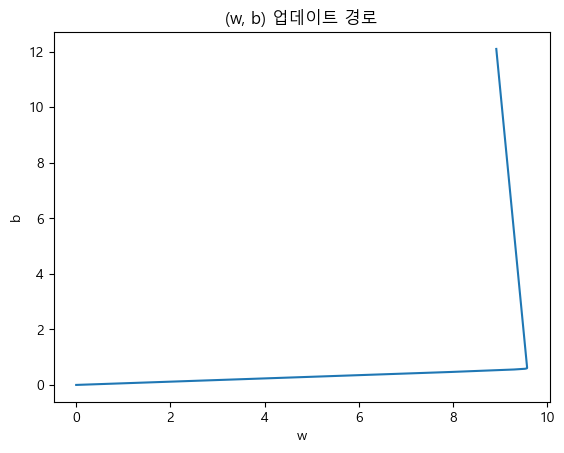

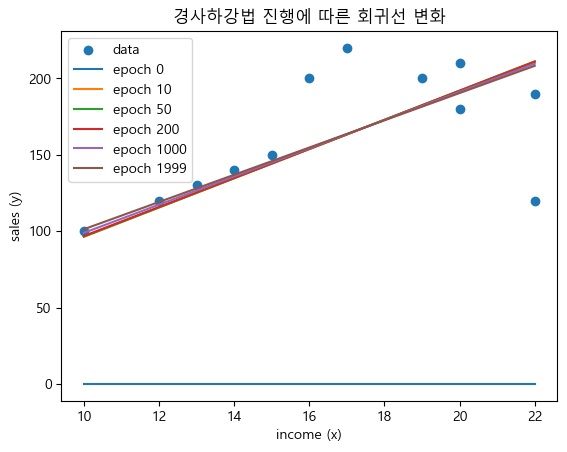

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# 데이터
# ----------------------------
x = np.array([10, 12, 13, 14, 15, 16, 17, 20, 22, 19, 20, 22], dtype=float)
y = np.array([100, 120, 130, 140, 150, 200, 220, 180, 190, 200, 210, 120], dtype=float)

n = len(x)

# (선택) 학습 안정성을 위해 x를 표준화하면 더 잘 수렴하는 경우가 많습니다.
# 아래 두 줄을 "주석 해제"하면 x를 표준화해서 학습합니다.
# x_mean, x_std = x.mean(), x.std()
# x = (x - x_mean) / x_std

# ----------------------------
# 모델/손실/그라디언트
# ----------------------------
def predict(x, w, b):
    return w * x + b           # 예측 함수

# 손실함수 (MSE)
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)
# 기울기(미분) 계산
# dw : 기울기 방향( w를 얼마나 줄이거나 늘릴지 )
# db : 절편 방향 변화량
def gradients(x, y, w, b):
    """
    MSE = (1/n) * sum (y - (wx+b))^2
    dMSE/dw = -(2/n) * sum x * (y - yhat)
    dMSE/db = -(2/n) * sum (y - yhat)
    """
    y_hat = predict(x, w, b)
    error = y - y_hat
    dw = -(2 / n) * np.sum(x * error)
    db = -(2 / n) * np.sum(error)
    return dw, db

# ----------------------------
# 경사하강법  초기 설정
# ----------------------------
w = 0.0
b = 0.0
lr = 0.001        # (learning rate)학습률(너무 크면 발산, 너무 작으면 느림)
epochs = 2000    # 전체 학습 반복 횟수

# 학습 기록용 리스트
w_hist, b_hist, loss_hist = [], [], []

# 회귀선 변화 스냅샷(몇 에폭에서 선을 저장할지)
snap_epochs = [0, 10, 50, 200, 1000, epochs-1]  # 특정 epoch에서의 (w, b)를 저장
snap_params = {}

# ----------------------------
# 학습 루프
# ----------------------------
for epoch in range(epochs):
    y_hat = predict(x, w, b)  # 예측 및 손실 계산
    loss = mse(y, y_hat)

    w_hist.append(w)  # 기록 저장
    b_hist.append(b)
    loss_hist.append(loss)

    if epoch in snap_epochs:  # 스냅샷 저장
        snap_params[epoch] = (w, b)

    dw, db = gradients(x, y, w, b)  # 기울기 계산
    w = w - lr * dw  # 파라미터 업데이트 (경사하강법)
    b = b - lr * db

# 마지막 스냅샷 저장(혹시 누락 대비)
snap_params[epochs-1] = (w_hist[-1], b_hist[-1])

print("최종 w, b:", w_hist[-1], b_hist[-1])
print("최종 MSE:", loss_hist[-1])

# ----------------------------
# 시각화 1) MSE 손실 곡선
# ----------------------------
plt.figure()
plt.plot(loss_hist)
plt.title("MSE Loss 감소(경사하강법)")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.show()

# ----------------------------
# 시각화 2) (w, b) 업데이트 경로
# ----------------------------
plt.figure()
plt.plot(w_hist, b_hist)
plt.title("(w, b) 업데이트 경로")
plt.xlabel("w")
plt.ylabel("b")
plt.show()

# ----------------------------
# 시각화 3) 에폭별 회귀선 스냅샷
# ----------------------------
plt.figure()
plt.scatter(x, y, label="data")

x_line = np.linspace(x.min(), x.max(), 200)
for e in snap_epochs:
    ww, bb = snap_params[e]
    plt.plot(x_line, ww * x_line + bb, label=f"epoch {e}")

plt.title("경사하강법 진행에 따른 회귀선 변화")
plt.xlabel("income (x)")
plt.ylabel("sales (y)")
plt.legend()
plt.show()


#### MSE 손실함수와 회귀선 변화 연결

In [37]:
# 회귀선 𝑦=𝑤𝑥+𝑏가 데이터와 멀수록 → 오차가 커지고 → MSE가 큼
# 경사하강법은 MSE를 줄이는 방향으로 𝑤,𝑏를 조금씩 움직임
# 그래서 회귀선 스냅샷을 보면:
# 초기에는 엉뚱한 선
# 에폭이 늘수록 데이터에 “잘 맞는” 선으로 이동
# 동시에 Loss 그래프는 감소
# (w,b) 업데이트 경로
# (w, b) 업데이트 경로 그래프는 “MSE를 줄이기 위해” 파라미터가 어떤 길로 이동했는지를 보여줍니다.

### 4. 다중회귀분석 

In [38]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor


##### 실제 데이터 입력

In [39]:
# 데이터 입력
df = pd.DataFrame({
    "sales":     [100, 120, 130, 140, 150, 200, 220, 180, 190, 200, 210, 120],
    "income":    [10, 12, 13, 14, 15, 16, 17, 20, 22, 19, 20, 22],
    "interest":  [1.2, 1.5, 1.4, 1.3, 1.4, 1.5, 1.4, 1.4, 1.4, 1.5, 1.5, 1.5],
    "inflation": [100, 105, 102, 103, 104, 104, 105, 105, 103, 102, 104, 105]
})

df


,sales,income,interest,inflation
0,100,10,1.2,100
1,120,12,1.5,105
2,130,13,1.4,102
3,140,14,1.3,103
4,150,15,1.4,104
5,200,16,1.5,104
6,220,17,1.4,105
7,180,20,1.4,105
8,190,22,1.4,103
9,200,19,1.5,102


##### 회귀분석 (OLS)

In [40]:
X = df[["income", "interest", "inflation"]]
X = sm.add_constant(X)   # 절편 추가
y = df["sales"]

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     1.441
Date:                Tue, 06 Jan 2026   Prob (F-statistic):              0.301
Time:                        00:19:11   Log-Likelihood:                -58.532
No. Observations:                  12   AIC:                             125.1
Df Residuals:                       8   BIC:                             127.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.5059    891.947     -0.022      0.9

C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)


- 해석 포인트
- coef : 각 설명변수의 영향
- P>|t| : 유의성 (0.05 이하이면 통계적으로 유의)

### 5. 잔차 검정

In [41]:
# 잔차(residual) = 실제값 − 예측값
# 적합값(fitted values) fitted = model.fittedvalues✔ 의미 회귀모형이 계산한 예측값
resid = model.resid
fitted = model.fittedvalues

#### (1) 정규성 검정 – Shapiro-Wilk

In [42]:
from scipy.stats import shapiro

# Shapiro–Wilk 검정 수행
# resid : 회귀모형의 잔차
# sh_stat : 검정통계량 
# sh_p : p-value (유의확률)
sh_stat, sh_p = shapiro(resid)
print(f"Shapiro-Wilk stat={sh_stat:.4f}, p-value={sh_p:.4f}")  #소수점 4자리까지 보기 좋게 출력,f-string을 사용한 포맷팅

Shapiro-Wilk stat=0.9464, p-value=0.5849


- p-value > 0.05 → 정규성 가정 OK

#### (2) 등분산성 검정 – Breusch-Pagan

In [43]:
from statsmodels.stats.diagnostic import het_breuschpagan

# 회귀모델에서 실제로 사용된 X(상수항 포함)를 그대로 사용
exog_used = model.model.exog      # (n x k) numpy array
resid_used = model.resid          # 길이 n

bp_lm, bp_lm_p, bp_f, bp_f_p = het_breuschpagan(resid_used, exog_used)

print(f"Breusch-Pagan p-value (LM) = {bp_lm_p:.4f}")
print(f"Breusch-Pagan p-value (F)  = {bp_f_p:.4f}")




Breusch-Pagan p-value (LM) = 0.3968
Breusch-Pagan p-value (F)  = 0.4930


- p-value > 0.05 → 등분산성 만족

#### (3) 독립성 검정 – Durbin-Watson

In [44]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(resid)
print(f"Durbin-Watson = {dw:.4f}")


Durbin-Watson = 1.2954


##### 잔차 진단 시각화

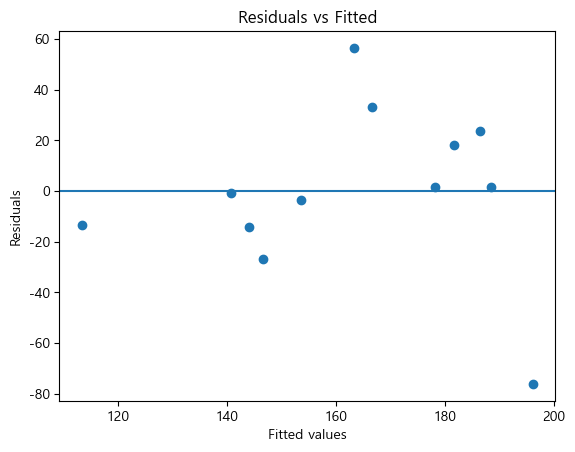

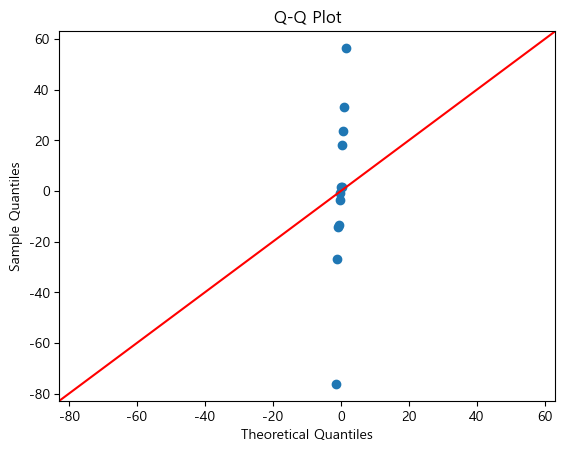

In [45]:
# 잔차 vs 적합값
plt.scatter(fitted, resid)
plt.axhline(0)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

# Q-Q plot
sm.qqplot(resid, line="45")
plt.title("Q-Q Plot")
plt.show()
